<a href="https://colab.research.google.com/github/Saudul-12/SimpleLinearRegression/blob/main/SLR_Assignment_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Q:- Build a simple linear regression model and do necessary transformations and select the best model using Python.**


**Delivery_time -> Predict delivery time using sorting time ?**

In [29]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [30]:
test = pd.read_csv('delivery_time.csv')
test

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [31]:
test.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


Text(0, 0.5, 'DT')

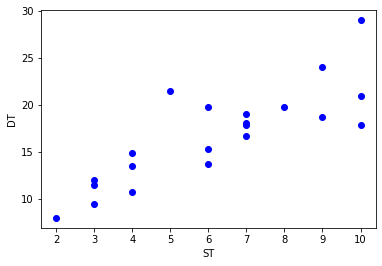

In [32]:
plt.plot(test.Sorting_Time, test.Delivery_Time, 'bo')
plt.xlabel('ST') 
plt.ylabel('DT') 

In [33]:
import statsmodels.formula.api as smf

In [34]:
model = smf.ols('Delivery_Time~Sorting_Time', data= test).fit()

In [35]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 24 May 2022   Prob (F-statistic):           3.98e-06
Time:                        16:08:41   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
model.resid

0    -2.072933
1     0.321186
2     3.273147
3     2.576087
4     5.927067
5    -1.126853
6     0.874127
7    -2.029794
8    -5.172933
9    -2.673913
10    0.055107
11   -2.428814
12   -1.445873
13   -0.029794
14    0.500206
15    1.701186
16   -2.726853
17   -0.015873
18   -1.880774
19   -0.295873
20    6.672167
dtype: float64

In [37]:
pred = model.predict(test.iloc[:,1])
pred 

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

Text(0, 0.5, 'DT')

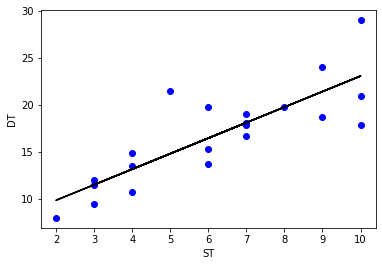

In [38]:
plt.plot(test.Sorting_Time, test.Delivery_Time, 'bo')
plt.plot(test.Sorting_Time, pred,color = 'black')
plt.xlabel('ST') 
plt.ylabel('DT') 

In [39]:
model2 = smf.ols('Delivery_Time~np.log(Sorting_Time)', data= test).fit()
model2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Tue, 24 May 2022   Prob (F-statistic):           2.64e-06
Time:                        16:08:42   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(Sorting_Time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
pred2 = model2.predict(test.iloc[:,1])
pred2

0     21.982913
1     13.696517
2     17.363305
3     21.030094
4     21.982913
5     17.363305
6     18.757354
7     11.094889
8     21.982913
9     21.030094
10    19.964933
11    13.696517
12    18.757354
13    11.094889
14    11.094889
15    13.696517
16    17.363305
17    18.757354
18     7.428100
19    18.757354
20    15.714496
dtype: float64

Text(0, 0.5, 'DT')

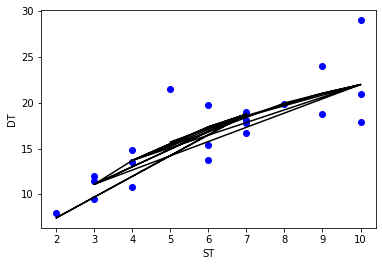

In [41]:
plt.plot(test.Sorting_Time, test.Delivery_Time,'bo')
plt.plot(test.Sorting_Time, pred2, color = 'black')
plt.xlabel('ST')
plt.ylabel('DT')

In [42]:
model3 = smf.ols('Delivery_Time~np.sqrt(Sorting_Time)', data= test).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     43.46
Date:                Tue, 24 May 2022   Prob (F-statistic):           2.61e-06
Time:                        16:08:42   Log-Likelihood:                -50.900
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -2.5188      2.995     -0.841      0.411      -8.788       3.751
np.sqrt(Sorting_Time)     7.9366      1.204      6.592      0.000       5.417      10.456
==============================================================================
Omnibus:                        4.658   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                2.824
Skew:                           0.865   Prob(JB):                        0.244
Kurtosis:                       3.483   Cond. No.                         13.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
pred3 = model3.predict(test.iloc[:,1])
pred3

0     22.578867
1     13.354345
2     16.921761
3     21.290936
4     22.578867
5     16.921761
6     18.479409
7     11.227742
8     22.578867
9     21.290936
10    19.929232
11    13.354345
12    18.479409
13    11.227742
14    11.227742
15    13.354345
16    16.921761
17    18.479409
18     8.705198
19    18.479409
20    15.227920
dtype: float64

In [44]:
model3.resid

0    -1.578867
1     0.145655
2     2.828239
3     2.709064
4     6.421133
5    -1.571761
6     0.520591
7    -1.727742
8    -4.678867
9    -2.540936
10   -0.099232
11   -2.604345
12   -1.799409
13    0.272258
14    0.802258
15    1.525655
16   -3.171761
17   -0.369409
18   -0.705198
19   -0.649409
20    6.272080
dtype: float64

Text(0, 0.5, 'DT')

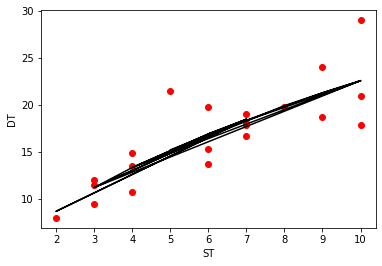

In [45]:
plt.plot(test.Sorting_Time, test.Delivery_Time, 'ro')
plt.plot(test.Sorting_Time,pred3,color = 'black')
plt.xlabel("ST")
plt.ylabel('DT')

In [46]:
model5 = smf.ols('Delivery_Time~np.sqrt(np.sqrt(Sorting_Time))', data= test).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     43.83
Date:                Tue, 24 May 2022   Prob (F-statistic):           2.47e-06
Time:                        16:08:42   Log-Likelihood:                -50.838
No. Observations:                  21   AIC:                             105.7
Df Residuals:                      19   BIC:                             107.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                        -20.6305      5.687     -3.628      0.002     -32.533      -8.728
np.sqrt(np.sqrt(Sorting_Time))    24.1372      3.646      6.620      0.000      16.506      31.768
==============================================================================
Omnibus:                        5.111   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.078   Jarque-Bera (JB):                3.160
Skew:                           0.910   Prob(JB):                        0.206
Kurtosis:                       3.548   Cond. No.                         20.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
#Model5 is giving the highest r-squared valued hence more accuracy.
pred5 = model5.predict(test.iloc[:,1])
pred5

0     22.292112
1     13.504587
2     17.146188
3     21.176283
4     22.292112
5     17.146188
6     18.630432
7     11.135774
8     22.292112
9     21.176283
10    19.963197
11    13.504587
12    18.630432
13    11.135774
14    11.135774
15    13.504587
16    17.146188
17    18.630432
18     8.073564
19    18.630432
20    15.462962
dtype: float64

Text(0, 0.5, 'DT')

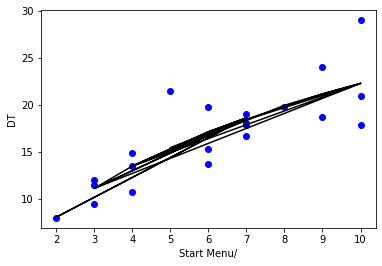

In [48]:
plt.plot(test.Sorting_Time,test.Delivery_Time,'bo')
plt.plot(test.Sorting_Time,pred5,color='black')
plt.xlabel('Start Menu/')
plt.ylabel('DT')